# Project: Choclate Rating Web Scrape
It's time to determine the best chocolate bar in the world. There's a website that contains over 1700 reviews of chocolate bars from around the world: https://content.codecademy.com/courses/beautifulsoup/cacao/index.html
<br><br>
The data is displayed in a table, rather than as a CSV or JSON file. 
<br><br>
*Use BeautifulSoup to transform the webpage into a DataFrame so that we can manipulate and analyze*:
1. Where are the best cocoa beans grown?
2. Which countries produce the best highest-rated bars?
3. What's the relationship between cocoa solids percentage and rating?

In [2]:
#Imports
import seaborn
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### What elements of the website will be useful to scrape?
We want to scrape the **cacoatable** as that contains the most relevant information for our analysis

### Make the request to the site

In [3]:
webpage_call = requests.get('https://content.codecademy.com/courses/beautifulsoup/cacao/index.html')

### Create BeautifulSoup Object
First, store the webpage_call as a new variable with its content
<br><br>
Then use a BeautifulSoup object to travese the HTML and then use the html.parser to parse the content:

In [4]:
webpage = webpage_call.content
soup = BeautifulSoup(webpage, 'html.parser')
print(soup)

<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<style>
         #cacaoTable {
         border-collapse: collapse;
         border: 2px black solid;
         font: 12px sans-serif;
         }
         #cacaoTable td {
         border: 1px black solid;
         padding: 5px;
         }
         #infoContainer {
         margin-bottom: 10px;
         display: inline-block;
         margin-right: 10px;
         }
         #chocolate {
         width: 300px;
         }
         #picContainer {
         display: inline;
         }
      </style>
<script async="" src="/cdn-cgi/bm/cv/669835187/api.js"></script></head>
<body>
<!-- <script src="http://d3js.org/d3.v3.min.js"></script> -->
<div id="banner">
<h1>Cacao Ratings</h1>
</div>
<div id="infoContainer">
<table class="infoTable">
<tr>
<td>Compiled ratings of over 1700 Chocolate bars</td>
</tr>
<tr>
<td>Ratings are from 1-5</td>
</tr>
</table>
</div>
<div id="picContainer">
<img id="chocolate" src="chocolate.jpg"/>
</div>
<

## How are the ratings distributed?
How many terrible chocolate bars are out there and how many earned a perfect 5? 
<br><br>
First, make a list out of all of the ratings; then make a hisogram out of this data. Don't forget to convert the result into a float to make calculation easier later on

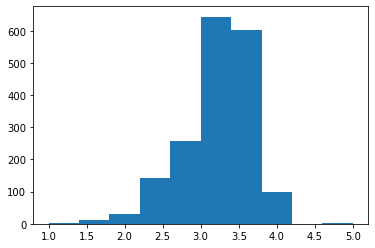

In [5]:
rating_lst = []
rate = soup.find_all(attrs={"class": "Rating"})
for rating in rate[1:]:
  rating_lst.append(float(rating.get_text()))

plt.hist(rating_lst)
plt.show()


## Which chocolatier makes the best chocolate?
We now want to find the top 10 most highly rated chocolatiers. 
<br><br>
First, make a DataFrame that has the chocolate companies in one column and the ratings in another
<br><br>
Then, determine who has the highest average rating

In [6]:
company_lst = []
company = soup.find_all(attrs={"class": "Company"})

for name in company[1:]:
    company_lst.append(name.get_text())
     
#Create column names and set the DataFrame
column_names = {'Company': company_lst, 'Rating': rating_lst}
chocolate_df = pd.DataFrame.from_dict(column_names)

average = chocolate_df.groupby('Company').Rating.mean()
top10 = average.nlargest(10)
print(top10)


Company
Tobago Estate (Pralus)                  4.000000
Heirloom Cacao Preservation (Zokoko)    3.875000
Ocelot                                  3.875000
Amedei                                  3.846154
Matale                                  3.812500
Patric                                  3.791667
Idilio (Felchlin)                       3.775000
Acalli                                  3.750000
Chocola'te                              3.750000
Christopher Morel (Felchlin)            3.750000
Name: Rating, dtype: float64


## Is more cacao better?
We want to see if the chocolate experts tend to rate chocolate bars with higher cacao to better than those with lower levels of cacao
<br><br>
Using the cocoa percent column create a list of cocoa percentages, turn them into integers after stripping the % character:

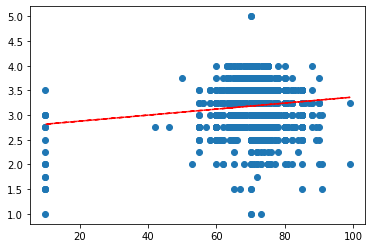

In [54]:
#Empty list, find all class, then the loop to strip % and decimal places
cacao_lst = []
cacao = soup.find_all(attrs={"class": "CocoaPercent"})

for coco in cacao[1:]:
    no_percent_or_decimal = int(coco.get_text().strip('%')[:2])
    cacao_lst.append(no_percent_or_decimal)
    
#Add new column to DataFrame
chocolate_df['CocoaPercentage'] = cacao_lst

#Scatterplot 
#Use plt.clf to clear the figure between showing histogram and scatterplot
plt.clf()
plt.scatter(chocolate_df.CocoaPercentage, chocolate_df.Rating)

#Line of best fit:
z = np.polyfit(chocolate_df.CocoaPercentage, chocolate_df.Rating, 1)
line_function = np.poly1d(z)
plt.plot(chocolate_df.CocoaPercentage, line_function(chocolate_df.CocoaPercentage), "r--")

plt.show()

## Where are the best beans grown?
Determine where the beans are grown and average rating based on their origin


In [71]:
country_lst = []
country = soup.find_all(attrs={"class": "BroadBeanOrigin"})

for name in country[1:]:
    country_lst.append(name.get_text())
    
chocolate_df['BroadBeanOrigin'] = country_lst

average_for_country = chocolate_df.groupby('BroadBeanOrigin').Rating.mean()
top10_country = average_for_country.nlargest(10)
print(top10_country)



BroadBeanOrigin
Dom. Rep., Madagascar           4.00
Gre., PNG, Haw., Haiti, Mad     4.00
Guat., D.R., Peru, Mad., PNG    4.00
Peru, Dom. Rep                  4.00
Ven, Bolivia, D.R.              4.00
Venezuela, Java                 4.00
DR, Ecuador, Peru               3.75
Dominican Rep., Bali            3.75
PNG, Vanuatu, Mad               3.75
Peru, Belize                    3.75
Name: Rating, dtype: float64


In [72]:
print(chocolate_df)

       Company  Rating  CocoaPercentage BroadBeanOrigin
0     A. Morin    3.75               63        Sao Tome
1     A. Morin    2.75               70            Togo
2     A. Morin    3.00               70            Togo
3     A. Morin    3.50               70            Togo
4     A. Morin    3.50               70            Peru
...        ...     ...              ...             ...
1790    Zotter    3.75               70            Peru
1791    Zotter    3.00               65           Congo
1792    Zotter    3.50               65           India
1793    Zotter    3.25               62           India
1794    Zotter    3.00               65          Brazil

[1795 rows x 4 columns]


## Which countries produce the highest-rated bars?
Determine which countries produce the highest-rated bars

In [79]:
company_location_lst = []
location = soup.find_all(attrs={"class": "CompanyLocation"})

for country in location[1:]:
    company_location_lst.append(country.get_text())
    
chocolate_df['CompanyLocation'] = company_location_lst

average_for_company_location = chocolate_df.groupby('CompanyLocation').Rating.mean()
top10_company_location = average_for_company_location.nlargest(10)

print(top10_company_location)

CompanyLocation
Chile          3.750000
Amsterdam      3.500000
Netherlands    3.500000
Philippines    3.500000
Iceland        3.416667
Vietnam        3.409091
Brazil         3.397059
Poland         3.375000
Australia      3.357143
Guatemala      3.350000
Name: Rating, dtype: float64
